##Hypothesis Testing

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.weightstats import ztest
df = pd.read_csv('/content/cookie_cats.csv.zip')


In [ ]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [ ]:
df.tail()

,userid,version,sum_gamerounds,retention_1,retention_7
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False
90188,9999861,gate_40,16,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [ ]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [ ]:
df.columns

Index(['userid', 'version', 'sum_gamerounds', 'retention_1', 'retention_7'], dtype='object')

In [ ]:
# The original code produced a KeyError because the 'target' column does not exist in the DataFrame.
# You can inspect the available columns using df.columns
# For example, to see the available columns, you could run:
# print(df.columns)

# If you intended to create a 'target' column, you would need to assign values to it first.
# For example, to create a new column named 'target' based on 'retention_1':
# df['target'] = df['retention_1'].astype(int)

# Or if you meant to access an existing column, please specify the correct column name.
# For now, let's just print the columns to clarify what's available:
print(df.columns)

Index(['userid', 'version', 'sum_gamerounds', 'retention_1', 'retention_7'], dtype='object')


In [ ]:
df.shape

(90189, 5)

## Duplicate Data



In [ ]:
# remove duplicates
df.duplicated().sum()

np.int64(0)

## Missing Values

In [ ]:
# check missing values
df.isnull().sum()

,0
userid,0
version,0
sum_gamerounds,0
retention_1,0
retention_7,0


##Drop Values

In [ ]:
# remove rows with missing values
df.dropna()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


## T- testing
##T-test tab use hota hai jab:

1. Sample size chhota ho (n < 30)

2. Population standard deviation unknown ho

3. Data normally distributed ho

In [ ]:
# column select
data = df["sum_gamerounds"]

In [ ]:
# One-sample t-test (H0: mean = 50)
t_stat, p_value = stats.ttest_1samp(data, 50)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 2.882973910242203
P-value: 0.003940331331138059


## Z-testing
Z-test tab use hota hai jab:

1. Sample size > 30 ho

2. Population standard deviation known ho (ya large sample ho to approximation allowed)

3. Data nearly normal ho

In [ ]:
# column select
data = df["sum_gamerounds"]

In [ ]:
# One sample Z-test (mean = 50)
z_stat, p_value = ztest(data, value=50)

print("Z-statistic:", z_stat)
print("P-value:", p_value)

Z-statistic: 2.882973910242203
P-value: 0.0039394006700836795


## camparision t- test and z-test

In [ ]:
# t-test
group_a = df[df["version"] == "gate_30"]["sum_gamerounds"]
group_b = df[df["version"] == "gate_40"]["sum_gamerounds"]

t_stat, p_value = stats.ttest_ind(group_a, group_b)

print(t_stat, p_value)

0.8910426211362967 0.37290868247405207


In [ ]:
#z-test
group_a = df[df["version"] == "gate_30"]["sum_gamerounds"]
group_b = df[df["version"] == "gate_40"]["sum_gamerounds"]

z_stat, p_value = stats.ttest_ind(group_a, group_b)

print(z_stat, p_value)

0.8910426211362967 0.37290868247405207


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


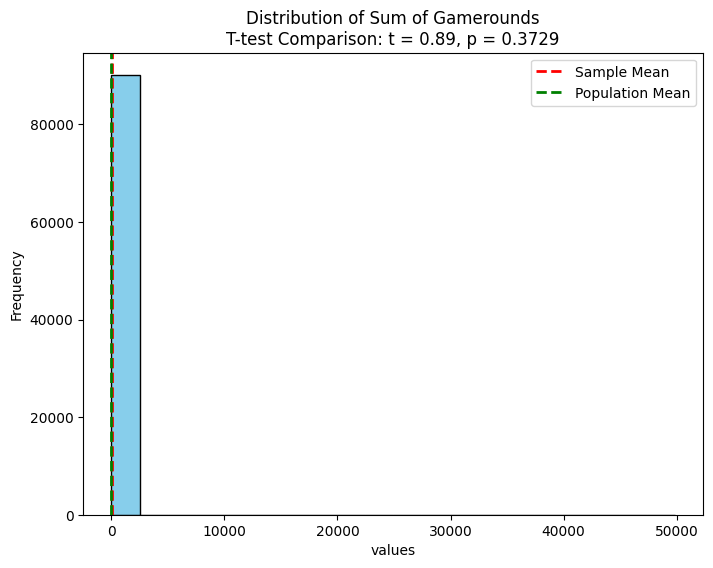

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df["sum_gamerounds"], bins=20, color='skyblue', edgecolor='black')
plt.axvline(np.mean(data), color='red', linestyle='dashed', linewidth=2,label = 'Sample Mean')
plt.axvline(10, color='green', linestyle='dashed', linewidth=2 , label = 'Population Mean')
plt.title(f'Distribution of Sum of Gamerounds\nT-test Comparison: t = {t_stat:.2f}, p = {p_value:.4f}')
plt.xlabel('values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

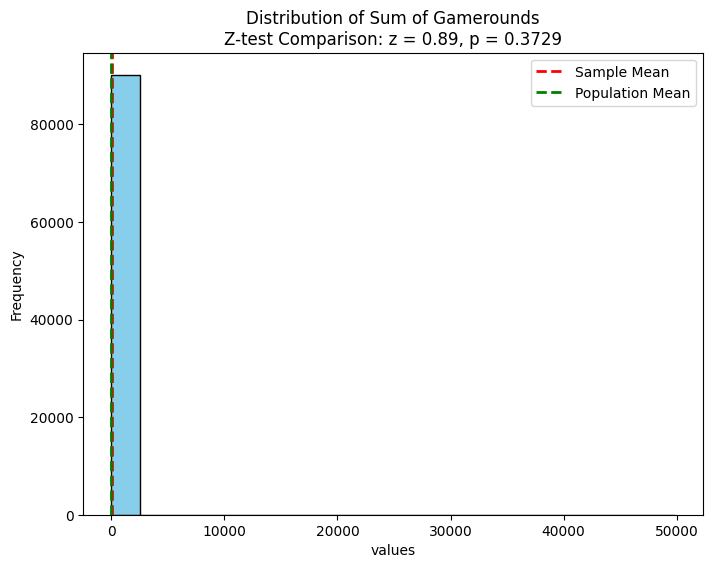

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df["sum_gamerounds"], bins=20, color='skyblue', edgecolor='black')
plt.axvline(np.mean(data), color='red', linestyle='dashed', linewidth=2,label = 'Sample Mean')
plt.axvline(10, color='green', linestyle='dashed', linewidth=2 , label = 'Population Mean')
plt.title(f'Distribution of Sum of Gamerounds\nZ-test Comparison: z = {z_stat:.2f}, p = {p_value:.4f}')
plt.xlabel('values')
plt.ylabel('Frequency')
plt.legend()
plt.show()